<a href="https://colab.research.google.com/github/Long-1234kfgkl/CS114.K21/blob/master/round3_add_feature.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

import thư viện

In [2]:
import pandas as pd  
import numpy as np  
import matplotlib.pyplot as plt  
import seaborn as seabornInstance 
from sklearn.model_selection import train_test_split 
from sklearn.linear_model import LinearRegression
from sklearn import metrics
%matplotlib inline

/usr/local/lib/python3.6/dist-packages/statsmodels/tools/_testing.py:19: FutureWarning: pandas.util.testing is deprecated. Use the functions in the public API at pandas.testing instead.
  import pandas.util.testing as tm


load data từ link"http://cs.uit.edu.vn/data3.txt"
Đặt 2 column là Size và Time

In [0]:
dataset = pd.read_csv("http://cs.uit.edu.vn/data3.txt",sep=' ',delimiter=',')
dataset.columns=["Size","Time"]

in ra các cột và hàng của dataset

In [0]:
import math
df=pd.DataFrame(dataset)
Size2=df['Size']**2
Sizelog=[df['Size'][i]*math.log(df['Size'][i]) for i in range(len(dataset))]
df['Size2']=Size2
df['Sizelog']=Sizelog

In [19]:
dataset.shape

(10589, 4)

In ra một số cặp data,label

In [20]:
dataset.head()

,Size,Time,Size2,Sizelog
0,37395246,3.92089,1398404423400516,6.520629e+08
1,36610827,3.21540,1340352653623929,6.376088e+08
2,29555651,2.54506,873536506033801,5.084100e+08
3,25928216,2.21831,672272384942656,4.426165e+08
4,30423112,2.61376,925565743764544,5.242119e+08


Bảng thống kê dataset ta đưa vào

In [21]:
dataset.describe()

,Size,Time,Size2,Sizelog
count,1.058900e+04,10589.000000,1.058900e+04,1.058900e+04
mean,2.999203e+07,2.642672,9.326867e+14,5.169152e+08
std,5.759148e+06,0.537139,3.468268e+14,1.048486e+08
min,2.000026e+07,1.669640,4.000106e+14,3.362296e+08
25%,2.503760e+07,2.180550,6.268812e+14,4.265377e+08
50%,2.994401e+07,2.639820,8.966436e+14,5.154813e+08
75%,3.500653e+07,3.100140,1.225457e+15,6.081000e+08
max,3.999734e+07,4.287660,1.599787e+15,7.001264e+08


Biểu diễn các điểm là mối liên hệ giữa 2 feature Size và Time (BIỂU ĐỒ)

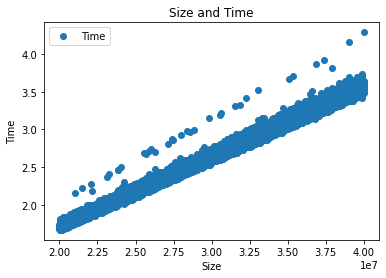

In [8]:
dataset.plot (x = 'Size', y = 'Time', style = 'o')
plt.title ( 'Size and Time')   
plt.xlabel ( 'Size')   
plt.ylabel ( 'Time') 
plt.show()

 đưa 2 feature Size và Time vào các biến X và y (đã được biến thàng dạng vector 1 chiều)

In [0]:
X = dataset[['Size','Size2','Sizelog']]
y = dataset['Time'].values.reshape(-1,1)

chia bộ dữ liệu thành 2 bộ, 80% cho training, 20% cho test

In [0]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=0)

Chọn model là LinearRegression
fit model

In [24]:
regressor = LinearRegression(fit_intercept=True)  
regressor.fit(X_train, y_train) #training the algorithm

LinearRegression(copy_X=True, fit_intercept=True, n_jobs=None, normalize=False)

In [0]:
predict dữ liệu

In [0]:
y_pred = regressor.predict(X_test)

In [0]:
Bảng hai giá trị thực và giá trị đã dự đoán

In [26]:
df = pd.DataFrame({'Actual': y_test.flatten(), 'Predicted': y_pred.flatten()})
df

,Actual,Predicted
0,2.39698,2.472918
1,2.66026,2.703206
2,2.75597,2.748598
3,2.90832,2.856526
4,1.94031,1.992020
...,...,...
2113,2.13180,2.136987
2114,2.19643,2.200689
2115,2.36696,2.438194
2116,2.46800,2.434812


Biểu đồ biễu diển 2 giá trị thực sự và dự đoán

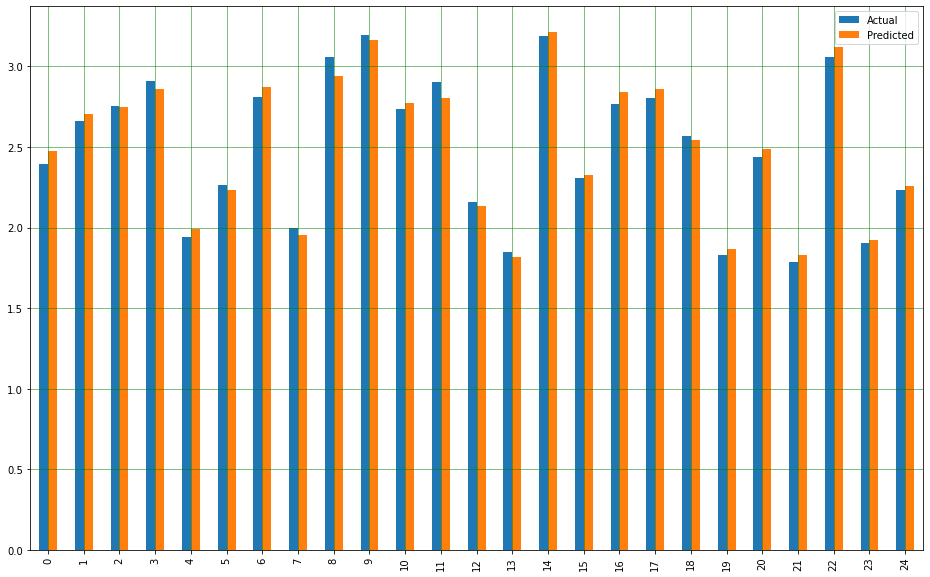

In [27]:
df1 = df.head(25)
df1.plot(kind='bar',figsize=(16,10))
plt.grid(which='major', linestyle='-', linewidth='0.5', color='green')
plt.grid(which='minor', linestyle=':', linewidth='0.5', color='black')
plt.show()

In ra:
dòng 1 MSQ: lỗi bình phương góc
,dòng 2 : độ chính xác trong huấn luyện train
,dòng 3 : độ chính xác trong huấn luyện test




In [28]:
import sklearn.metrics as metrics
print('Mean Squared Error:', metrics.mean_squared_error(y_test, y_pred))  
print(regressor.score(X_train,y_train))
print(regressor.score(X_test,y_test))

Mean Squared Error: 0.0033020795124207906
0.9884332601352819
0.9882067807766125
